## Project: Deep Learning in for MR Elastography
### A. Pre-processing

In [49]:
import scipy.io
import keras
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import pandas as pd
import random 

from keras.datasets import mnist
from keras.utils import np_utils

%matplotlib inline 



### Data cleaning

In [9]:
root='/Users/liginsolamen/MRE/MREData/DataSlice'
matfiles=[]
for path,dirs,files in os.walk(root,topdown=True):
    for file in files:
        if file.endswith('.mat'):
            matfiles.append(os.path.join(path,file))


In [72]:
int(matfile.replace('_','/').split('/')[-1][:-4])

3

In [77]:
Ur=[]
Ui=[]
Freq=[]
RS=[]
Filename=[]
Fslice=[]

for matfile in matfiles:
    bb=scipy.io.loadmat(matfile)
    Ur.append(bb['Ur_slice'])
    Ui.append(bb['Ui_slice'])
    Freq.append(bb['freq_slice'][0][0])
    RS.append(bb['RealShear_slice'])
    Filename.append(matfile.split('/')[-1])
    Fslice.append(int(matfile.replace('_','/').split('/')[-1][:-4]))
    #Fslice retrieves the slice number of the data set.
    
    
    
    

#### Data in Pandas dataframe:
#### Ui, Ur: 3D displacement amplitude vector
#### Rs: shear stiffness

In [78]:
df=pd.DataFrame({'Filename' : pd.Series(Filename),
                 'Fslice'   : pd.Series(Fslice),
                 'Ur'       : pd.Series(Ur),
                 'Ui'       : pd.Series(Ui),
                 'Freq'     : pd.Series(Freq),
                 'RS'       : pd.Series(RS)})

In [42]:
print('Number of samples: {}'.format(len(df)))

Number of samples: 612


In [76]:
df.head(n=2)

,Filename,Freq,Fslice,RS,Ui,Ur
0,Data4slice_16.mat,50,16,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1,Data1slice_13.mat,100,13,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


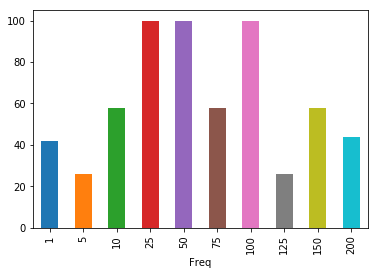

In [41]:
df.groupby('Freq').size().plot(kind='bar')


### Example of one slice of image

In [84]:
df.to_msgpack('/Users/liginsolamen/MRE/MREData/MREdata_070718.msg')


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
df=pd.read_msgpack('/Users/syp/Desktop/git/mre/MREdata_072118.msg')

In [46]:
k=random.sample(range(len(df)),1)[0]
imU=(df.Ui[k])**2+(df.Ur[k])**2
imR=(df.RS[k])

Text(0.5,1,'z')

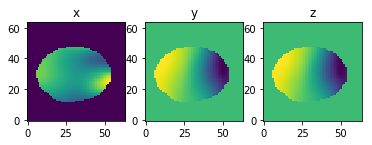

In [47]:
ax=plt.subplot(1, 3, 1)
plt.imshow(im[:,:,0],origin='lower')
plt.title('x')
ax=plt.subplot(1, 3, 2)
plt.imshow(im[:,:,1],origin='lower')
plt.title('y')
ax=plt.subplot(1, 3, 3)
plt.imshow(im[:,:,1],origin='lower')
plt.title('z')

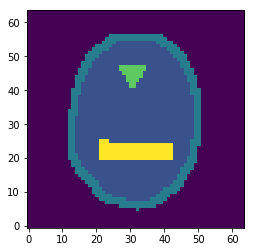

In [48]:
plt.imshow(imR,origin='lower')